In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
sp.init_printing

<function sympy.interactive.printing.init_printing(pretty_print=True, order=None, use_unicode=None, use_latex=None, wrap_line=None, num_columns=None, no_global=False, ip=None, euler=False, forecolor=None, backcolor='Transparent', fontsize='10pt', latex_mode='plain', print_builtin=True, str_printer=None, pretty_printer=None, latex_printer=None, scale=1.0, **settings)>

In [30]:
def rk1(f,time,initial,h):
    points=np.arange(time[0],time[1]+h,h)
    n=len(points)
    sol=np.zeros(n)
    sol[0]=initial
    for i in range(1,n):
        sol[i]=sol[i-1]+h*f.subs({t:points[i-1],y:sol[i-1]})
    return sol

In [35]:
def rk2(f,time,initial,h):
    points=np.arange(time[0],time[1]+h,h)
    n=len(points)
    sol=np.zeros(n)
    sol[0]=initial
    for i in range(1,n):
        k1=f.subs({t:points[i-1],y:sol[i-1]})
        k2=f.subs({t:points[i-1]+h,y:sol[i-1]+h*k1})
        sol[i]=sol[i-1]+h*(k1/2+k2/2)
    return sol

In [36]:
def rk4(f,time,initial,h):
    points=np.arange(time[0],time[1]+h,h)
    n=len(points)
    sol=np.zeros(n)
    sol[0]=initial
    for i in range(1,n):
        k1=f.subs({t:points[i-1],y:sol[i-1]})
        k2=f.subs({t:points[i-1]+h/2,y:sol[i-1]+h/2*k1})
        k3=f.subs({t:points[i-1]+h/2,y:sol[i-2]+h/2*k2})
        k4=f.subs({t:points[i-1]+h,y:sol[i-1]+h*k3})
        sol[i]=sol[i-1]+h*(k1/6+k2/3+k3/3+k4/6)
    return sol

In [37]:
x,y,t=sp.symbols("x y t")

In [38]:
f=t*y #y'=f(t,y) 
time=[0,2] #intravl(time)
initial=1 #y(t_0)
h=0.1 #step size
Euler_sol=rk1(f,time,initial,h) #here, we call the function
rk2_sol=rk2(f,time,initial,h)
rk4_sol=rk4(f,time,initial,h)

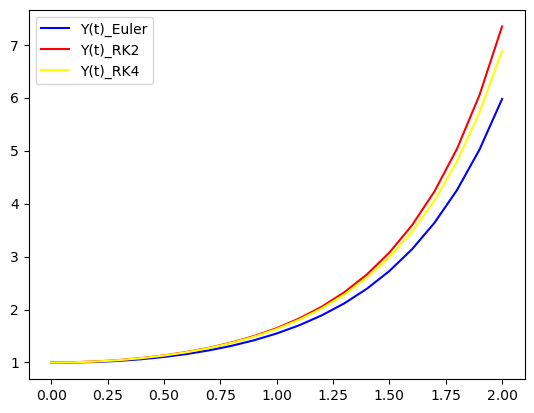

In [39]:
points=np.arange(time[0],time[1]+h,h)
fig,ax=plt.subplots()
ax.plot(points,Euler_sol,color="blue",label="Y(t)_Euler")
ax.plot(points,rk2_sol,color="red",label="Y(t)_RK2")
ax.plot(points,rk4_sol,color="Yellow",label="Y(t)_RK4")
ax.legend()

In [52]:
t=sp.Symbol("t")
ode_fn= lambda t,y:sp.sin(t)+3*sp.cos(2*t)-y
t_begin=0
t_end=10
exact_sol=(1/2)*sp.sin(t)-(1/2)*sp.cos(t)+(3/5)*sp.cos(2*t)+(6/5)*sp.sin(2*t)-(1/10)*sp.exp(-t)
exact_sol_nm=sp.lambdify(t,exact_sol,modules="numpy")
y_init=exact_sol.subs({t:0})
num_sol=solve_ivp(ode_fn,[t_begin,t_end],[y_init],method="RK45",t_eval=None)
num_sol.t,num_sol.y
exact_sol_nm(num_sol.t)

array([-2.77555756e-17,  2.99989998e-04,  3.29878778e-03,  3.31745164e-02,
        3.18733768e-01,  7.83834268e-01, -4.19379561e-01, -4.60078998e-01,
        1.07790310e+00,  1.28994895e+00, -8.03218602e-01, -2.02167125e+00,
       -3.84202114e-01,  1.20910758e+00,  2.62266299e-01, -6.45853521e-01,
        4.65138693e-01,  1.54689095e+00,  1.48790421e+00])

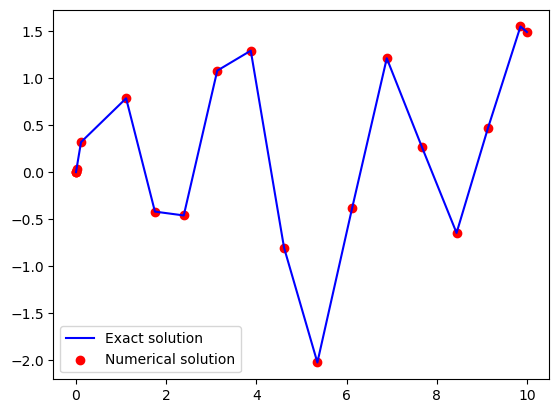

In [53]:
fig,ax=plt.subplots()
ax.plot(num_sol.t,exact_sol_nm(num_sol.t),color="blue",label="Exact solution")
ax.scatter(num_sol.t,num_sol.y[0],color="red",label="Numerical solution")
ax.legend()

In [54]:
t=sp.Symbol("t")
ode_fn= lambda t,y:sp.sin(t)+3*sp.cos(2*t)-y
t_begin=0
t_end=10
h=0.1
t_space=np.arange(t_begin,t_end+h,h)
exact_sol=(1/2)*sp.sin(t)-(1/2)*sp.cos(t)+(3/5)*sp.cos(2*t)+(6/5)*sp.sin(2*t)-(1/10)*sp.exp(-t)
exact_sol_nm=sp.lambdify(t,exact_sol,modules="numpy")
y_init=exact_sol.subs({t:0})
num_sol=solve_ivp(ode_fn,[t_begin,t_end],[y_init],method="RK45",t_eval=t_space)
num_sol.t,num_sol.y
exact_sol_nm(num_sol.t)

array([-2.77555756e-17,  2.88374028e-01,  5.47366908e-01,  7.68782374e-01,
        9.45998004e-01,  1.07421499e+00,  1.15063382e+00,  1.17454918e+00,
        1.14736040e+00,  1.07249740e+00,  9.55265206e-01,  8.02613525e-01,
        6.22840832e-01,  4.25244893e-01,  2.19733973e-01,  1.64143882e-02,
       -1.74828927e-01, -3.44741938e-01, -4.85084608e-01, -5.88972131e-01,
       -6.51160564e-01, -6.68265327e-01, -6.38903766e-01, -5.63755988e-01,
       -4.45541488e-01, -2.88912438e-01, -1.00267879e-01,  1.12503800e-01,
        3.40343801e-01,  5.73390520e-01,  8.01381120e-01,  1.01407096e+00,
        1.20165409e+00,  1.35516791e+00,  1.46686573e+00,  1.53054226e+00,
        1.54179884e+00,  1.49823770e+00,  1.39957735e+00,  1.24768415e+00,
        1.04651887e+00,  8.01999902e-01,  5.21788464e-01,  2.15004251e-01,
       -1.08117513e-01, -4.36614034e-01, -7.59212698e-01, -1.06476214e+00,
       -1.34265962e+00, -1.58325787e+00, -1.77823528e+00, -1.92091490e+00,
       -2.00651964e+00, -

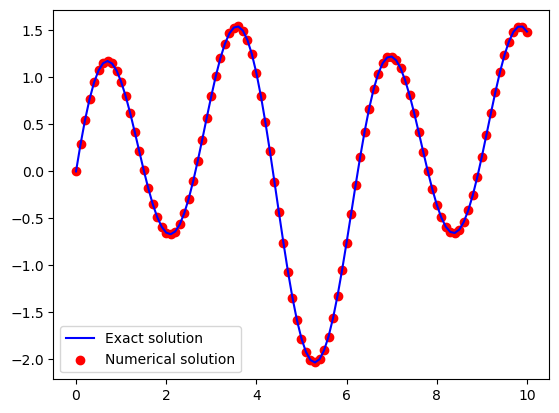

In [55]:
fig,ax=plt.subplots()
ax.plot(num_sol.t,exact_sol_nm(num_sol.t),color="blue",label="Exact solution")
ax.scatter(num_sol.t,num_sol.y[0],color="red",label="Numerical solution")
ax.legend()

In [62]:
ode_fn_sys= lambda t,y:[t**2*y[1],-t*y[0]]
t_begin=0
t_end=10
y_init_sys=[1,1]
num_sol_sys=solve_ivp(ode_fn_sys,[t_begin, t_end],y_init_sys,method='RK45',t_eval=None)
num_sol_sys, num_sol_sys.y[0], num_sol_sys.y[1]

(  message: The solver successfully reached the end of the integration interval.
   success: True
    status: 0
         t: [ 0.000e+00  1.000e-04 ...  9.984e+00  1.000e+01]
         y: [[ 1.000e+00  1.000e+00 ...  2.001e+00  2.128e+00]
             [ 1.000e+00  1.000e+00 ...  2.472e-01 -9.236e-02]]
       sol: None
  t_events: None
  y_events: None
      nfev: 854
      njev: 0
       nlu: 0,
 array([ 1.        ,  1.        ,  1.        ,  1.00000046,  1.00045542,
         1.2740288 ,  1.12073073,  0.07478818, -1.16372742, -1.46417341,
        -0.45647501,  0.96456767,  1.60353934,  0.75372405, -0.71438157,
        -1.64800515, -1.03463282,  0.60348893,  1.68051227,  1.13994978,
        -0.48569805, -1.6842427 , -1.2792362 ,  0.30412742,  1.65431957,
         1.43485155, -0.06437201, -1.57596403, -1.59813323, -0.23461713,
         1.42533391,  1.75016536,  0.49043451, -1.2551019 , -1.83793383,
        -0.75038114,  1.03852192,  1.87345462,  1.04056925, -0.73820381,
        -1.84991805

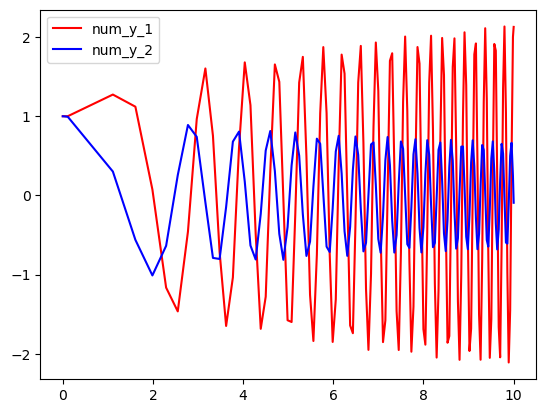

In [63]:
fig,ax1=plt.subplots()
ax1.plot(num_sol_sys.t,num_sol_sys.y[0],color="red",label="num_y_1")
ax1.plot(num_sol_sys.t,num_sol_sys.y[1],color="blue",label="num_y_2")
ax1.legend()